# Modelo de Regressão Linear

O objetivo desse projeto é criar um modelo de regressão linear para estimar o consumo de cerveja, de acordo com as variáveis disponilizadas.

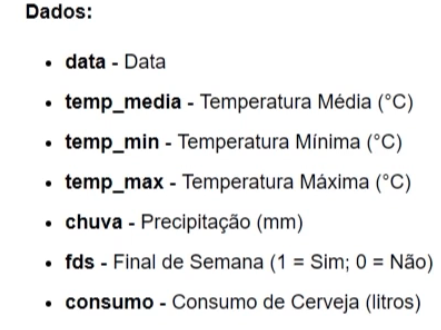

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns
import scipy as sp

In [ ]:
dados = pd.read_csv('Consumo_cerveja.csv', sep = ';')


In [ ]:
dados

data  temp_media  temp_min  temp_max  chuva  fds  consumo
0    01/01/2015       27.30      23.9      32.5    0.0    0    25461
1    02/01/2015       27.02      24.5      33.5    0.0    0    28972
2    03/01/2015       24.82      22.4      29.9    0.0    1    30814
3    04/01/2015       23.98      21.5      28.6    1.2    1    29799
4    05/01/2015       23.82      21.0      28.3    0.0    0    28900
..          ...         ...       ...       ...    ...  ...      ...
360  27/12/2015       24.00      21.1      28.2   13.6    1    32307
361  28/12/2015       22.64      21.1      26.7    0.0    0    26095
362  29/12/2015       21.68      20.3      24.1   10.3    0    22309
363  30/12/2015       21.38      19.3      22.4    6.3    0    20467
364  31/12/2015       24.76      20.2      29.0    0.0    0    22446

[365 rows x 7 columns]

In [ ]:
dados.shape

(365, 7)

Análise Descritiva

In [ ]:
dados.describe().round(2)

temp_media  temp_min  temp_max   chuva     fds   consumo
count      365.00    365.00    365.00  365.00  365.00    365.00
mean        21.23     17.46     26.61    5.20    0.28  25401.37
std          3.18      2.83      4.32   12.42    0.45   4399.14
min         12.90     10.60     14.50    0.00    0.00  14343.00
25%         19.02     15.30     23.80    0.00    0.00  22008.00
50%         21.38     17.90     26.90    0.00    0.00  24867.00
75%         23.28     19.60     29.40    3.20    1.00  28631.00
max         28.86     24.50     36.50   94.80    1.00  37937.00

Matriz de correlações

O coeficiente de correlação é um número que varia entre -1 a 1

Em modelos de regressão linear, é importante verificarmos se as variáveis explicativas (X's) têm forte correlação com a variável dependente (Y)

Em modelos de regressão linear, é importante que as variáveis explicativas (X's) não tenham forte correlação entre si

Lembrando que correlações positivas indicam que as duas variáveis se movem na mesma direção e correlações negativas indicam uma relação oposta.

In [ ]:
dados.drop('data', axis = 1).corr().round(4)

temp_media  temp_min  temp_max   chuva     fds  consumo
temp_media      1.0000    0.8628    0.9225  0.0244 -0.0508   0.5746
temp_min        0.8628    1.0000    0.6729  0.0986 -0.0595   0.3925
temp_max        0.9225    0.6729    1.0000 -0.0493 -0.0403   0.6427
chuva           0.0244    0.0986   -0.0493  1.0000  0.0016  -0.1938
fds            -0.0508   -0.0595   -0.0403  0.0016  1.0000   0.5060
consumo         0.5746    0.3925    0.6427 -0.1938  0.5060   1.0000

## Comportamento da variável dependente


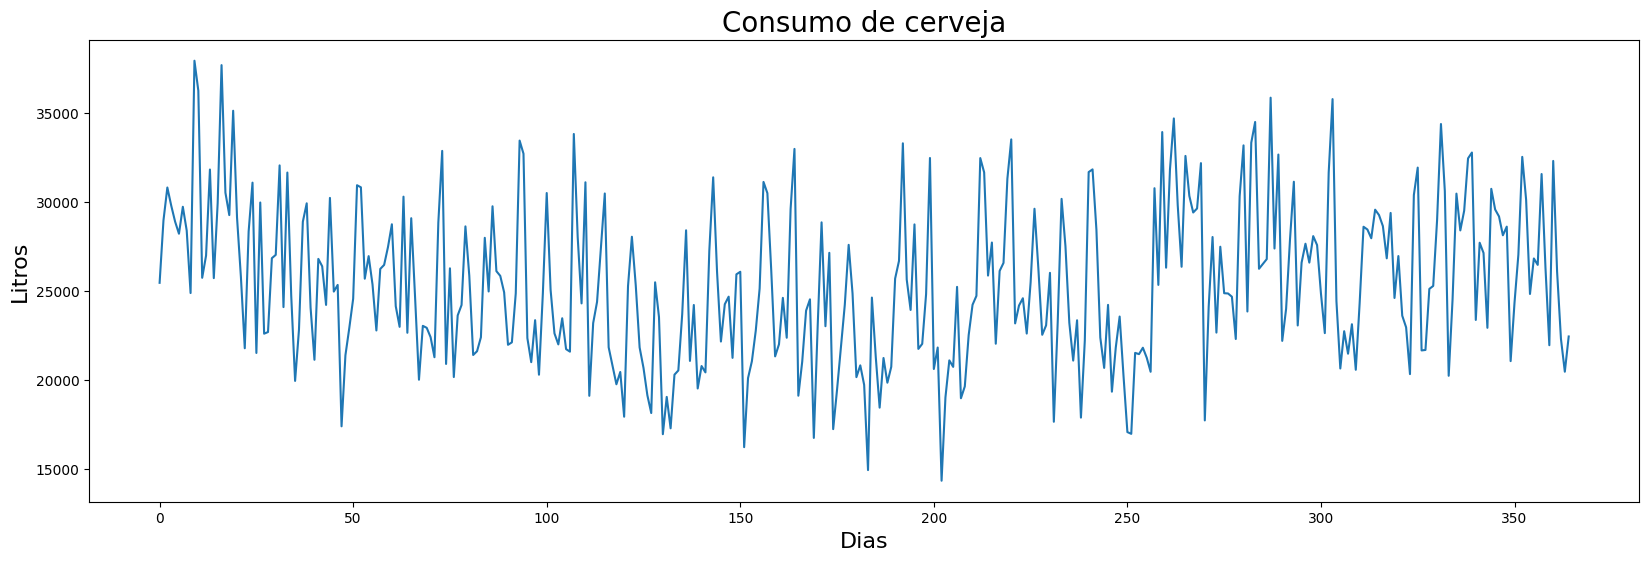

In [ ]:
fig, ax = plt.subplots(figsize = (20, 6))

ax.set_title('Consumo de cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax.set_xlabel('Dias', fontsize = 16)
ax = dados['consumo'].plot()

 ## Usando Box plot

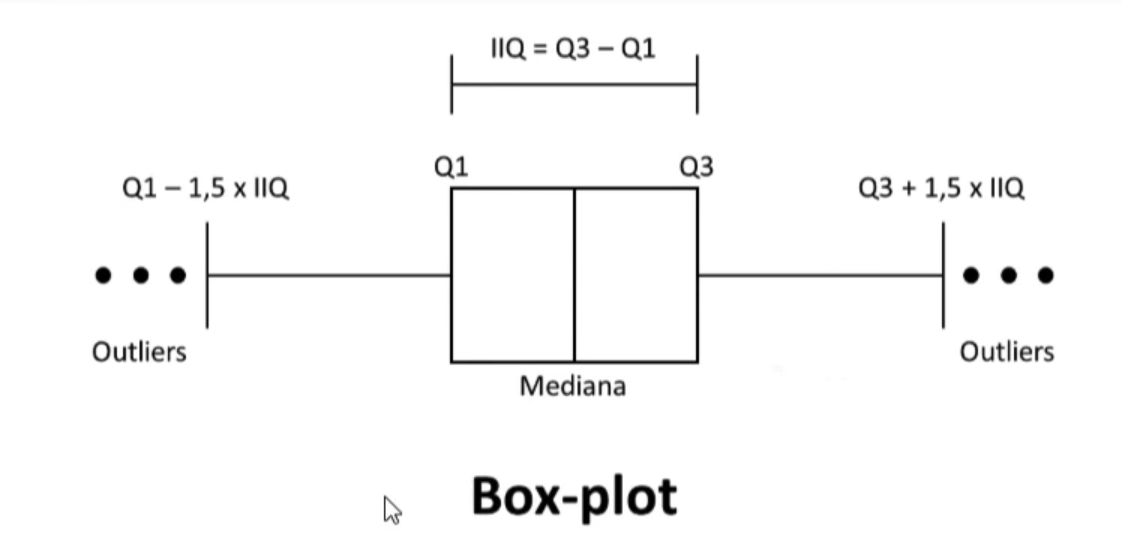

O box plot nos ajuda a identificar a presença de algum tipo de assimetria na distribuição dos dados

Podemos utilizar o box plot como ferramenta para identificar possíveis outliers em nosso conjunto de dados

Para construir um box plot, precisamos do primeiro, segundo e terceiro quartis da variável

 Duas das principais características de um box plot é a possibilidade de identificar a simetria ou assimetria (figura abaixo) do conjunto de dados e a presença de outliers.



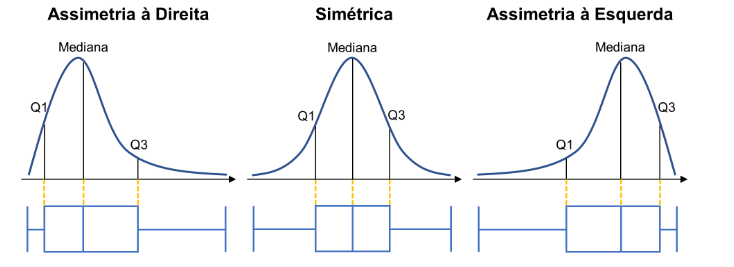

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='consumo', ylabel='Litros'>

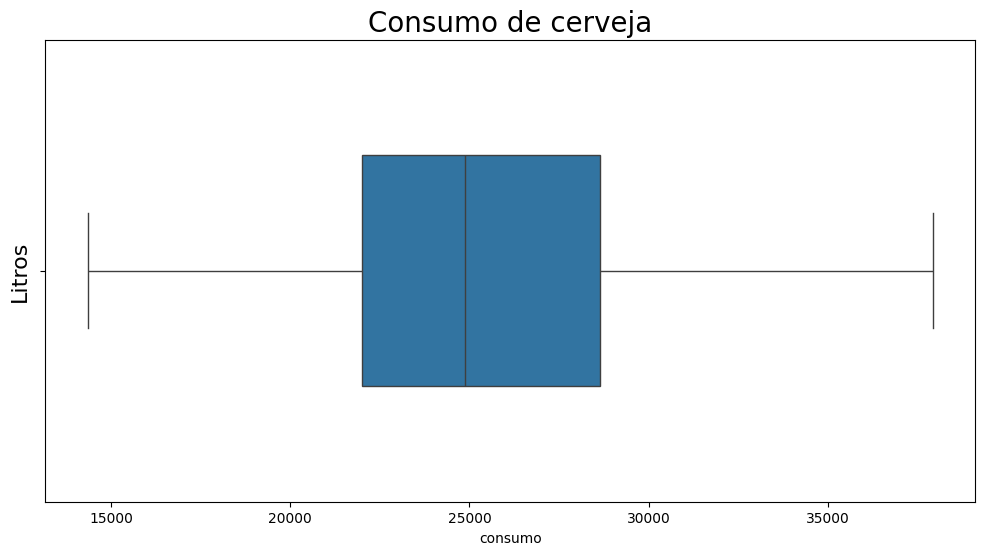

In [ ]:
ax = sns.boxplot(data = dados['consumo'], orient = 'h', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de cerveja', fontsize = 20)
ax.set_ylabel('Litros', fontsize = 16)
ax

<Axes: title={'center': 'Consumo de cerveja'}, xlabel='Final de Semana', ylabel='Consumo'>

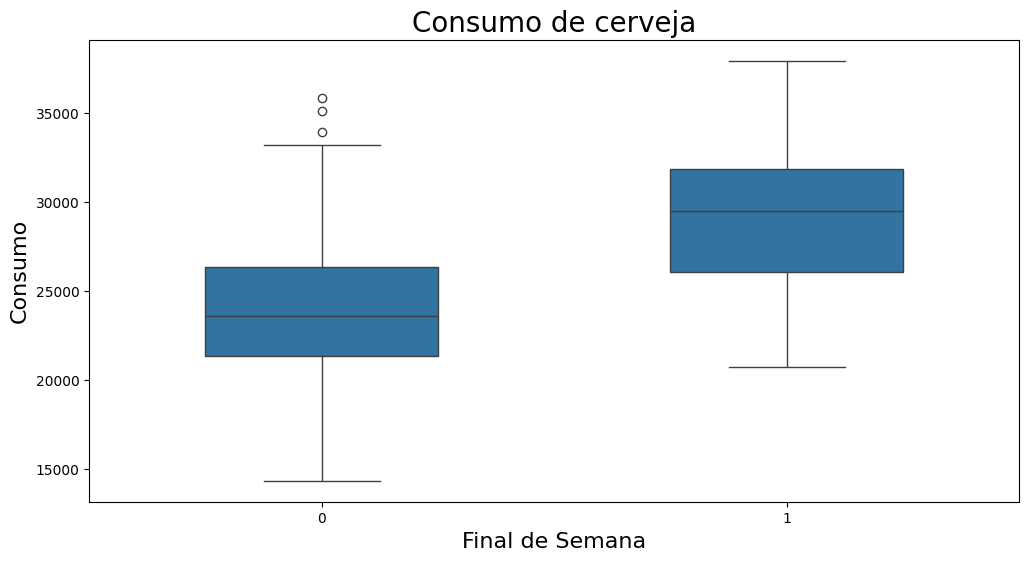

In [ ]:
ax = sns.boxplot(y = 'consumo', x = 'fds', data = dados, orient = 'v', width = 0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Consumo de cerveja', fontsize = 20)
ax.set_ylabel('Consumo', fontsize = 16)
ax.set_xlabel('Final de Semana', fontsize = 16)
sns.set_palette('BrBG')
sns.set_style('darkgrid')
ax

Os métodos estatísticos mais conhecidos supõem que a variável dependente segue a distribuição normal

Uma forma preliminar de se averiguar a hipótese de normalidade da variável dependente é através do histograma

Uma das funções da biblioteca seaborn para plotar o histograma de uma variável é a distplot() ou em versões mais recentes a função histplot().

<ipython-input-11-4a57635d3beb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(dados['consumo'])


<Axes: title={'center': 'Distribuição de Frequência de cerveja'}, xlabel='consumo', ylabel='Consumo de cerveja'>

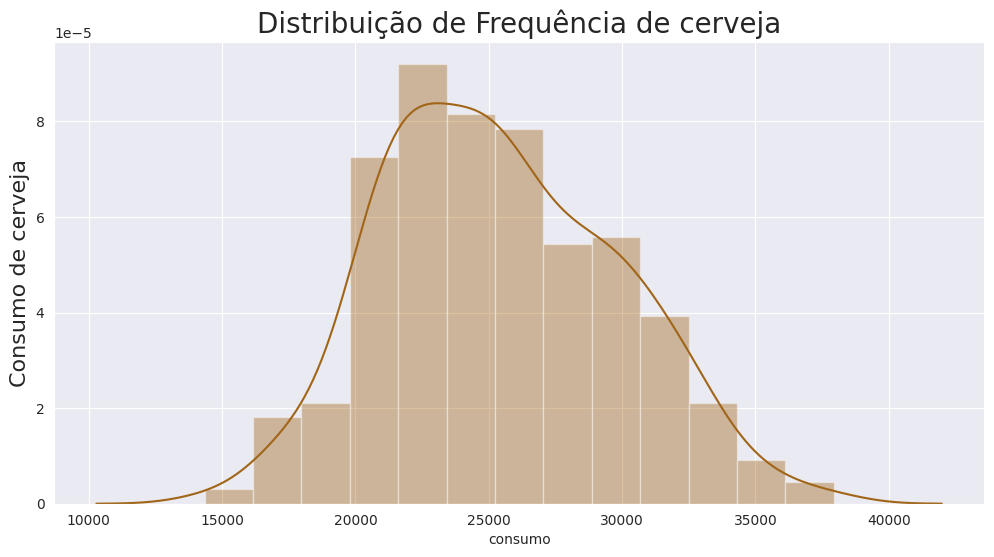

In [ ]:
ax = sns.distplot(dados['consumo'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência de cerveja', fontsize = 20)
ax.set_ylabel('Consumo de cerveja', fontsize = 16)
ax

# Pairplot

O método pairplot do Seaborn é utilizado para criar uma matriz de gráficos que exibe as relações entre pares de variáveis em um conjunto de dados.

Ele é particularmente útil para explorar visualmente a estrutura multivariada dos dados e identificar padrões, correlações e possíveis outliers.

Os parâmetros principais incluem:

data: DataFrame que contém os dados.

hue: Nome de uma variável categórica para colorir os pontos.

kind: Tipo de gráfico a ser usado ('scatter' para gráficos de dispersão, 'kde' para gráficos de densidade).

diag_kind: Tipo de gráfico na diagonal ('auto', 'hist', 'kde').


Com o uso de gráficos de dispersão, podemos identificar se duas variáveis apresentam uma relação linear entre elas e também a direção desta relação.

A função pairplot() plota os histogramas de cada variável e também os gráficos de dispersão entre todas as variáveis de um DataFrame.

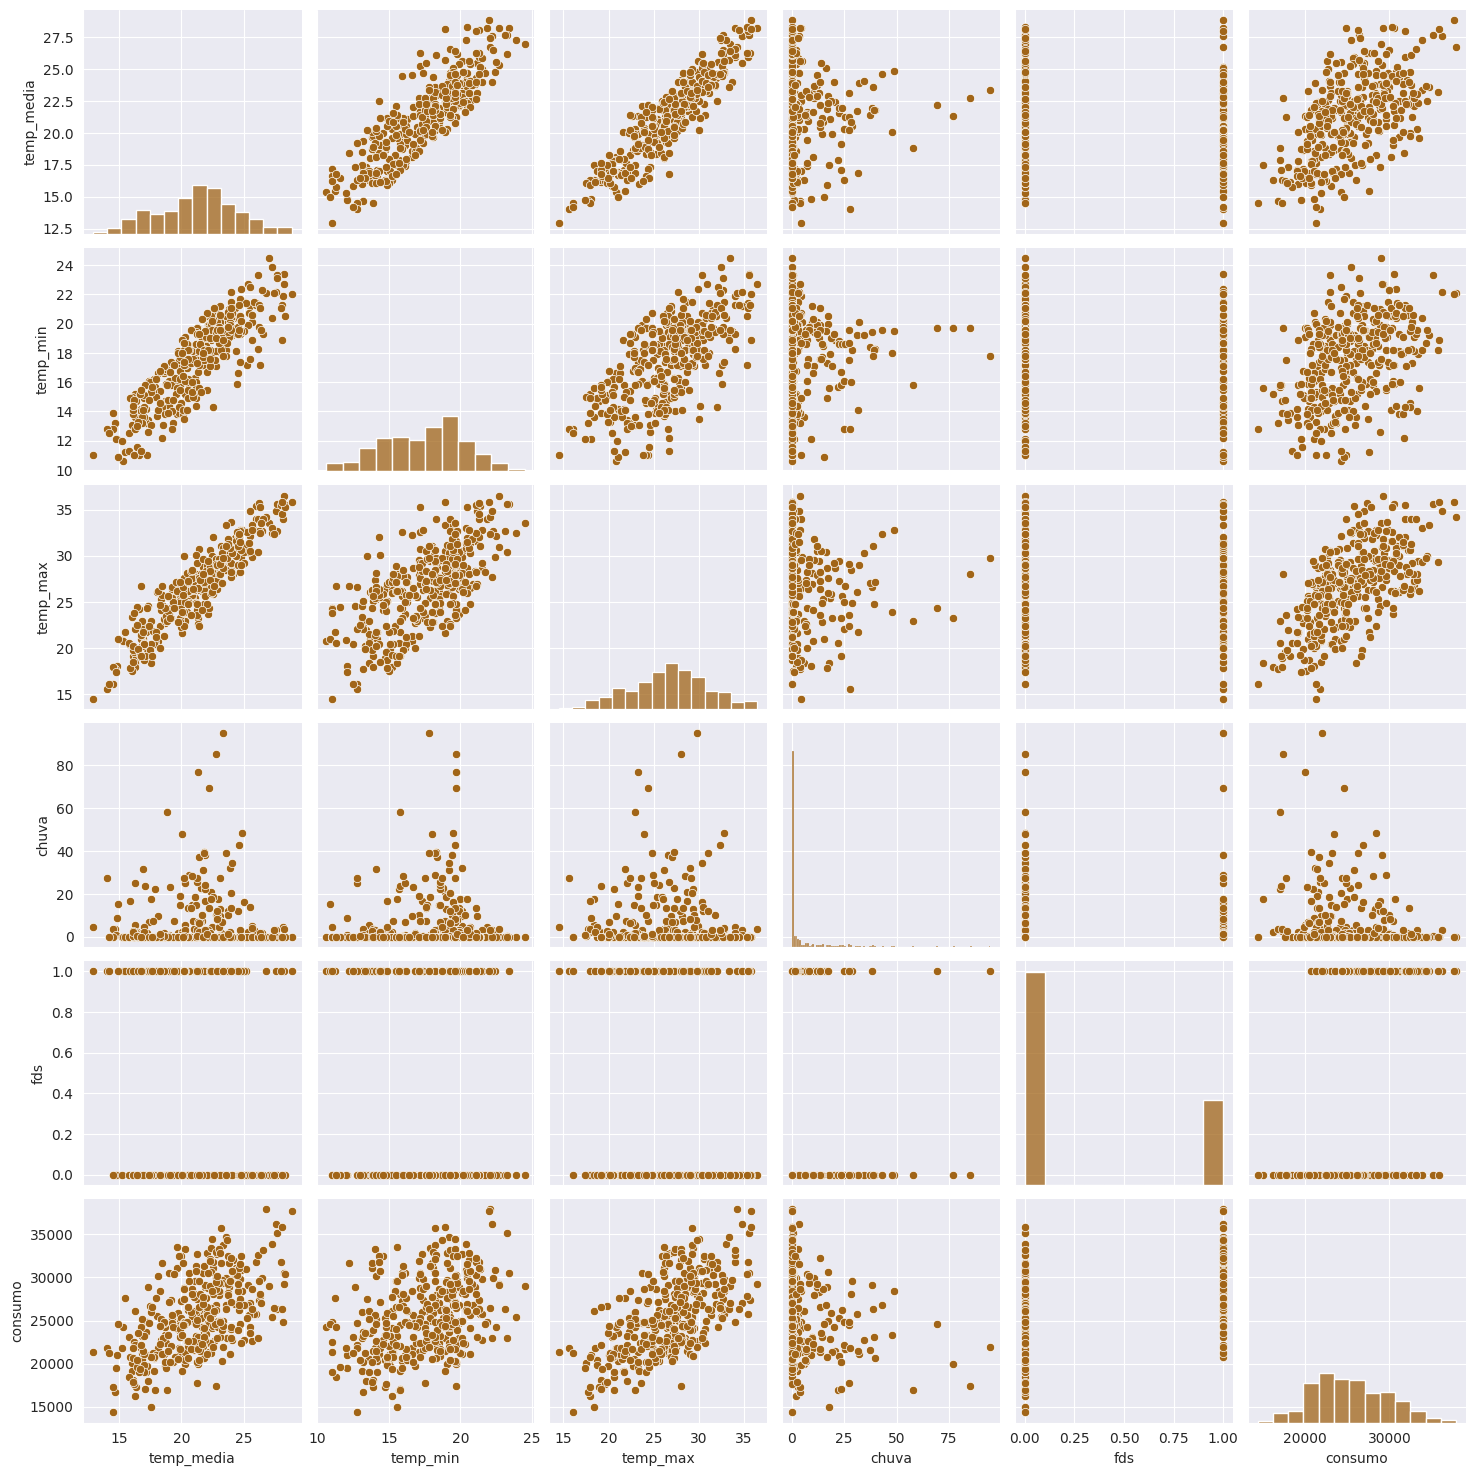

In [ ]:
ax = sns.pairplot(dados)

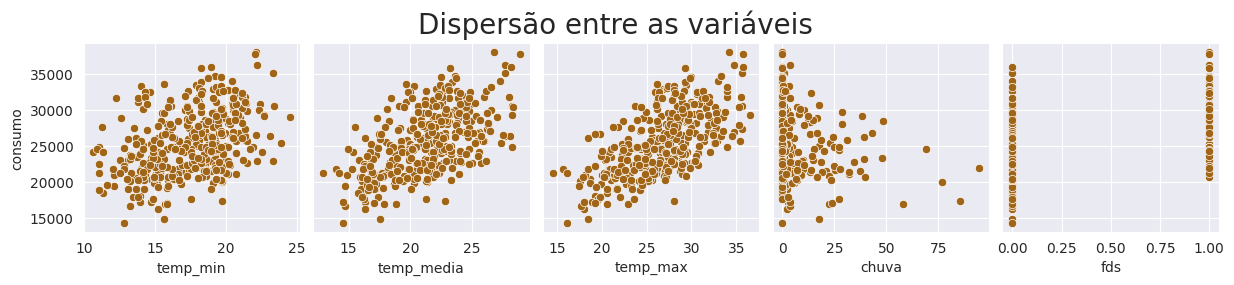

In [ ]:
ax = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min', 'temp_media','temp_max', 'chuva', 'fds'])
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
ax

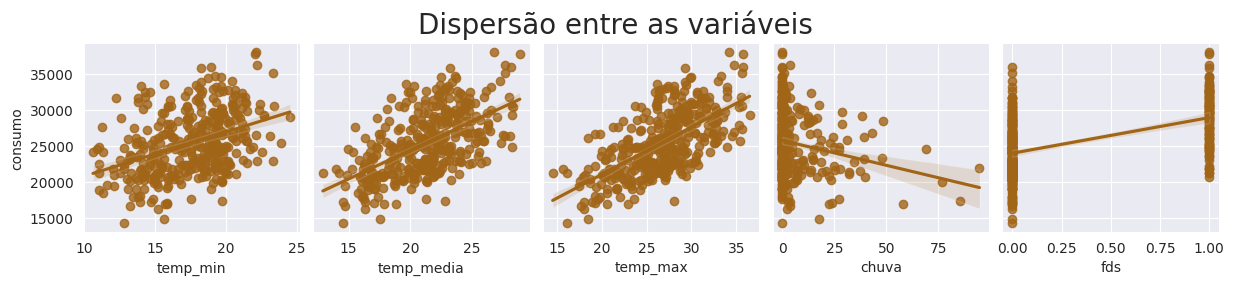

In [ ]:
ax = sns.pairplot(dados, y_vars = 'consumo', x_vars = ['temp_min', 'temp_media','temp_max', 'chuva', 'fds'], kind = 'reg')
ax.fig.suptitle('Dispersão entre as variáveis', fontsize = 20, y = 1.1)
ax

# Jointplot

O método jointplot do Seaborn é utilizado para criar gráficos que exibem a relação entre duas variáveis junto com as distribuições marginais dessas variáveis. Ele combina gráficos de dispersão (scatter plots) com histogramas ou gráficos de densidade (KDE plots) para fornecer uma visualização detalhada da relação entre duas variáveis e suas distribuições individuais.

Os parâmetros principais incluem:

x: Nome da variável no eixo x.

y: Nome da variável no eixo y.

data: DataFrame que contém os dados.

kind: Tipo de gráfico para exibir a relação entre as variáveis ('scatter', 'kde', 'hist', 'hex', 'reg', 'resid').

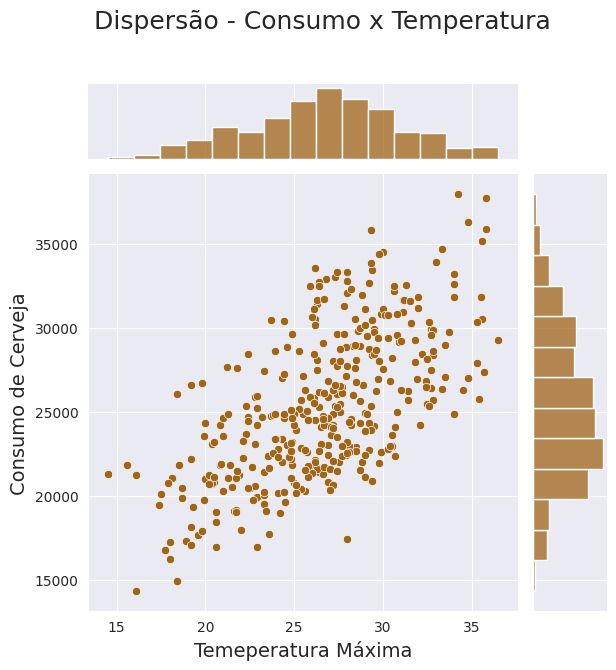

In [ ]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados)
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize = 18, y = 1.1)
ax.set_axis_labels('Temeperatura Máxima', 'Consumo de Cerveja', fontsize = 14)
ax

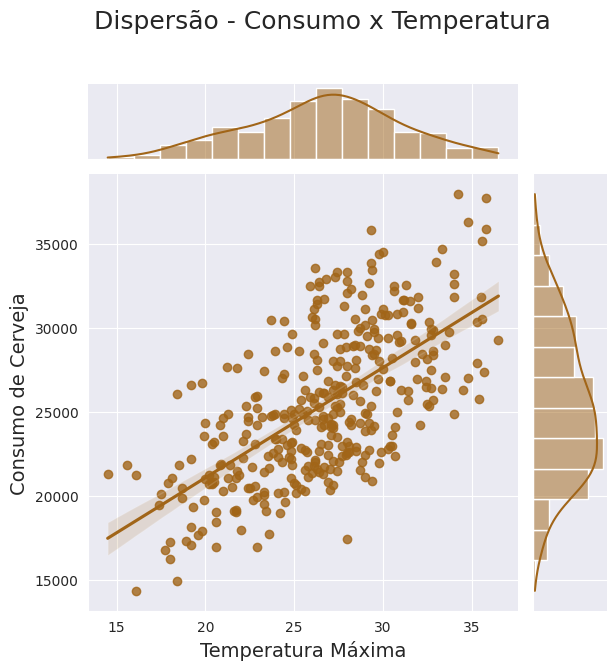

In [ ]:
ax = sns.jointplot(x = 'temp_max', y = 'consumo', data = dados, kind = 'reg')
ax.fig.suptitle('Dispersão - Consumo x Temperatura', fontsize = 18, y = 1.1)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de Cerveja', fontsize = 14)
ax

# Lmplot

O método lmplot do Seaborn é utilizado para criar gráficos de dispersão com a inclusão de uma linha de regressão linear, permitindo visualizar a relação entre duas variáveis e a tendência linear dessa relação. É uma ferramenta útil para explorar a correlação entre variáveis e identificar tendências.

Os parâmetros principais incluem:

x: Nome da variável no eixo x.

y: Nome da variável no eixo y.

data: DataFrame que contém os dados.

hue: Nome de uma variável categórica para colorir os pontos de acordo com diferentes grupos.

col: Nome de uma variável categórica para criar colunas de subgráficos.

row: Nome de uma variável categórica para criar linhas de subgráficos.

palette: Paleta de cores para diferentes grupos.

height: Altura de cada facet.

aspect: Proporção da largura para a altura de cada facet.

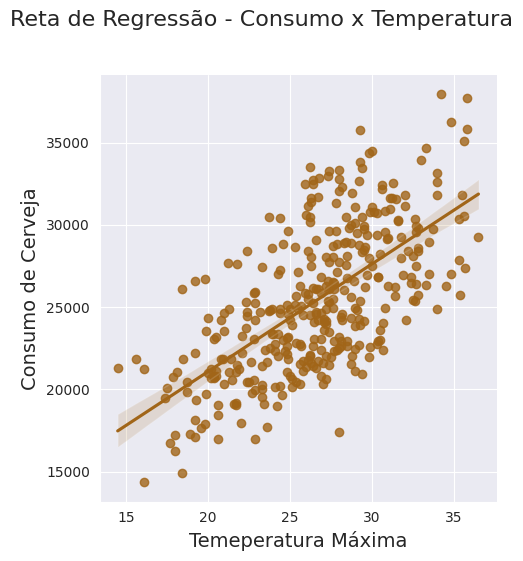

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize = 16, y = 1.1)
ax.set_xlabels('Temeperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax

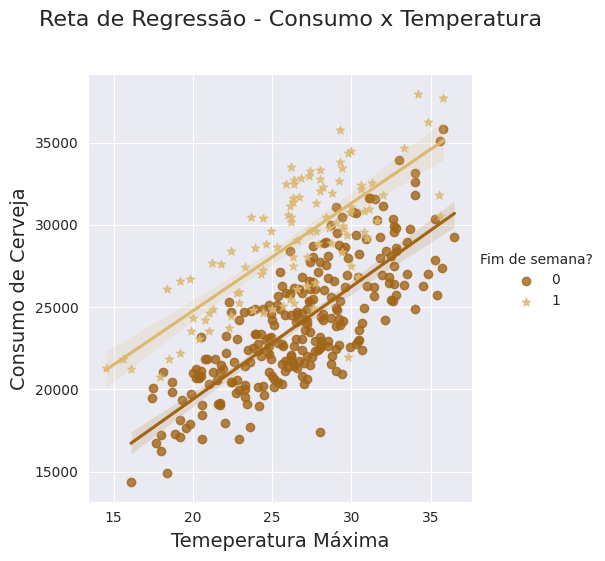

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, hue = 'fds', markers = ['o', '*'], legend = False)
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize = 16, y = 1.1)
ax.set_xlabels('Temeperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax.add_legend(title = 'Fim de semana?')
ax

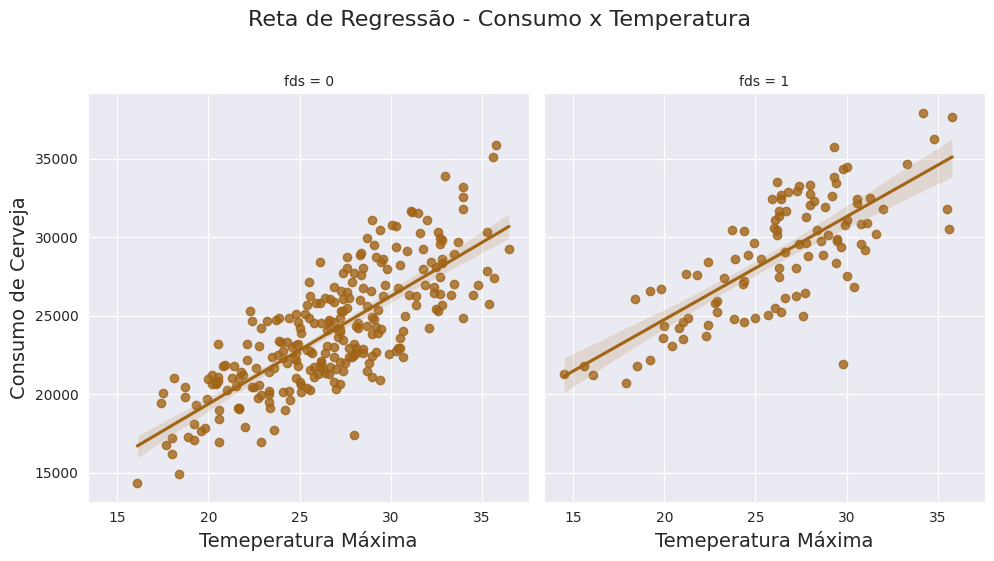

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, col = 'fds', )
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize = 16, y = 1.1)
ax.set_xlabels('Temeperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax

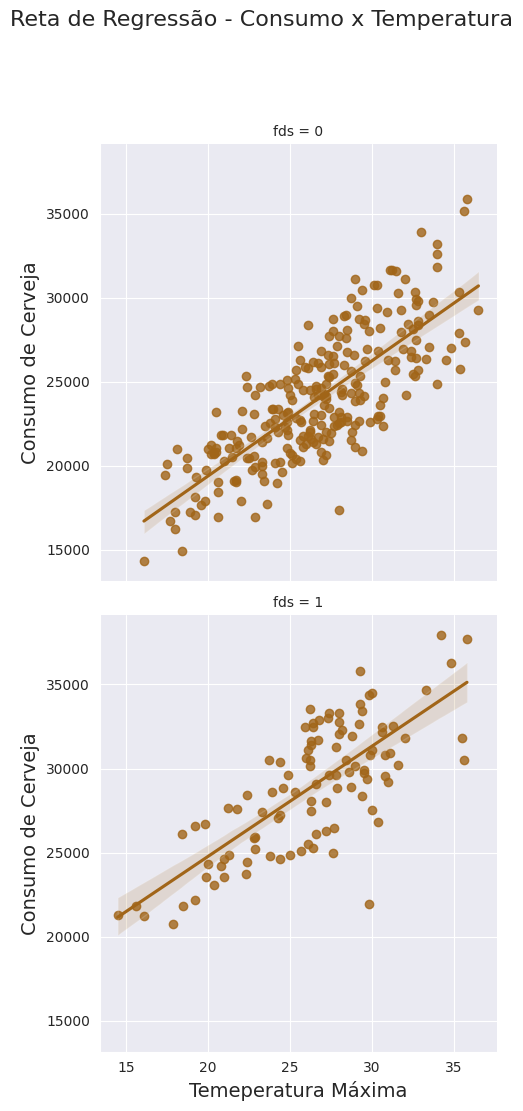

In [ ]:
ax = sns.lmplot(x = 'temp_max', y = 'consumo', data = dados, row = 'fds', )
ax.fig.suptitle('Reta de Regressão - Consumo x Temperatura', fontsize = 16, y = 1.1)
ax.set_xlabels('Temeperatura Máxima', fontsize = 14)
ax.set_ylabels('Consumo de Cerveja', fontsize = 14)
ax

# Datasets de treino e teste


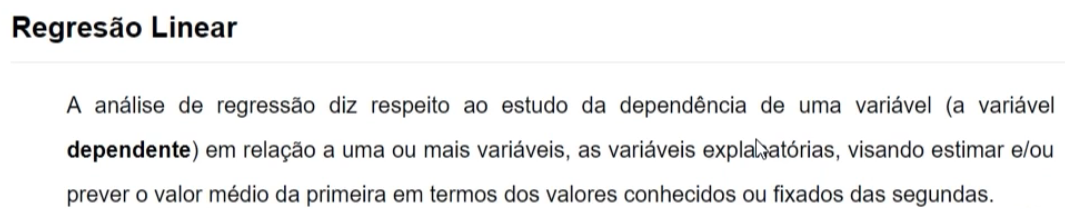

A técnica de separação aleatória de um dataset em dois conjuntos distintos (conjuntos de treino e teste), estimar o modelo com os dados de um destes conjuntos (conjunto de treino) e posteriormente realizar estimações com os dados do segundo conjunto (conjunto de teste) é uma técnica bastante utilizada em data science, para confirmar a eficácia do modelo estimado.

O scikit-learn disponibiliza uma função que faz essa separação, basta que informemos os dados de nosso modelo e qual o tamanho desejado dos conjuntos de treino e teste. Seria da seguinte forma o código:

train_test_split(X, y, test_size=0.3)

Onde Y é a série com a variável dependente, X é onde está o DataFrame com variáveis explicativas e test_size o percentual da base que desejamos separar para testes, no caso acima, 30%.

Esta função retorna, para o conjunto de variáveis explicativas (X), um conjunto de treino e outro de teste (X_train e X_test) e para a variável dependente (Y), um conjunto de treino e outro para teste (y_train e y_test).

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = dados['consumo']
X = dados[['temp_max', 'chuva', 'fds']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 2811)

In [ ]:
X_train.shape

(255, 3)

In [ ]:
X_test.shape

(110, 3)


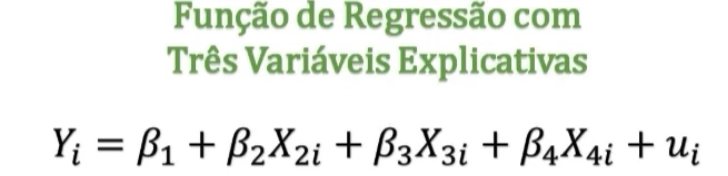

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
modelo = LinearRegression()

In [ ]:
modelo.fit(X_train, y_train)

LinearRegression()

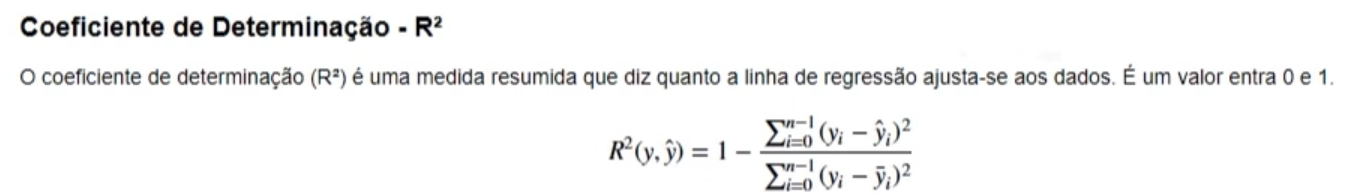

In [ ]:
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

R² = 0.73


In [ ]:
y_previsto = modelo.predict(X_test)

In [ ]:
print('R² = %s' % metrics.r2_score(y_test, y_previsto).round(2))

R² = 0.69


O coeficiente de determinação (R²) é uma medida resumida, que diz o quanto a linha de regressão ajusta-se aos dados. R² mede o quanto da variação da variável dependente é explicada pelo modelo estimado.

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explanatórias, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

O coeficiente de determinação (R²) é um valor entre 0 e 1.

## Previsões pontuais


Alternativa correta! Exato, com o método .predict(), precisamos passar como parâmetros os valores das variáveis explicativas, para obtermos uma previsão da variável dependente.

Criando uma predição pontual

In [ ]:
entrada = X_test[0:1] ## pegamos o primeiro valor
entrada

temp_max  chuva  fds
5      30.5   12.2    0

In [ ]:
modelo.predict(entrada)[0] ## prevemos a quantidade de litros consumidos, usando o primeiro valor como entrada

26094.901775262017

Criando um simulador simples

In [ ]:
temp_max = 30.5
chuva = 12.2
fds = 0
entrada = [[temp_max, chuva, fds]]
modelo.predict(entrada)[0]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

26094.90 litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
temp_max = 39
chuva = 0
fds = 1
entrada = [[temp_max, chuva, fds]]
modelo.predict(entrada)[0]

print('{0:.2f} litros'.format(modelo.predict(entrada)[0]))

38057.79 litros


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


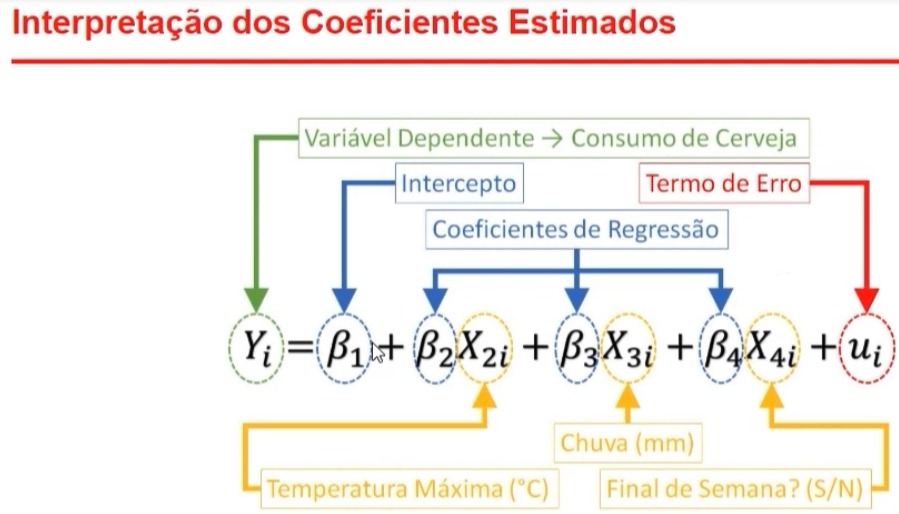

In [ ]:
modelo.intercept_

5951.976339312445

In [ ]:
type(modelo.intercept_)

numpy.float64

In [ ]:
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

In [ ]:
type(modelo.coef_)

numpy.ndarray

In [ ]:
index = ['Intercepto', 'Temperatura Maxima', 'Chuva(mm)', 'Final de Semana' ]

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_, modelo.coef_), index = index, columns = ['Parâmetros'])

Parâmetros
Intercepto          5951.976339
Temperatura Maxima   684.736759
Chuva(mm)            -60.782435
Final de Semana     5401.083339

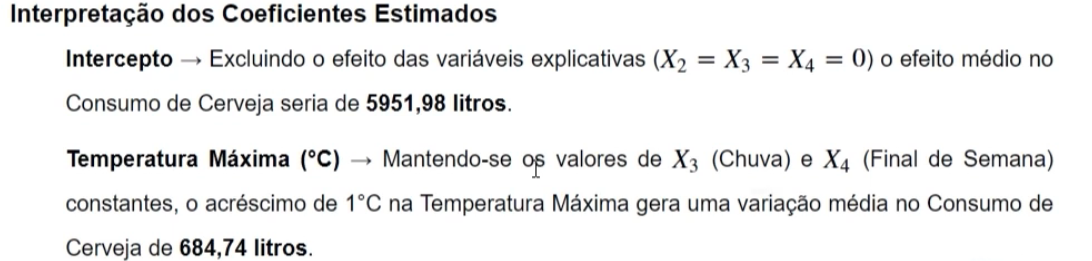

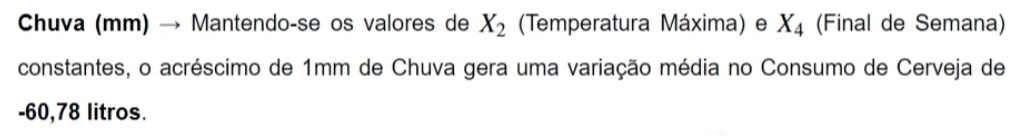

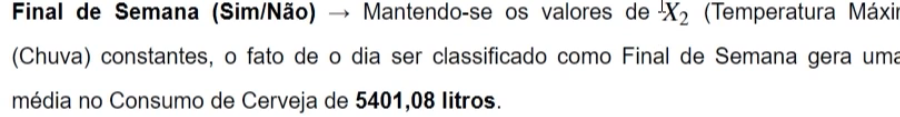

o intercepto representa o efeito médio em Y (variável dependente), quando todas as variáveis explicativas forem iguais a 0.

Desta forma, ao colocar que as variáveis explicativas foram excluídas do modelo, percebemos que o próprio modelo não poderia ser estimado ou usado para fazer previsões, visto que não haveriam variáveis independentes para explicar a variação na variável dependente.

# Análises gráficas das previsões

In [ ]:
y_previsto_train = modelo.predict(X_train)

<Axes: title={'center': 'Previsão X Real'}, xlabel='Previsão', ylabel='Real'>

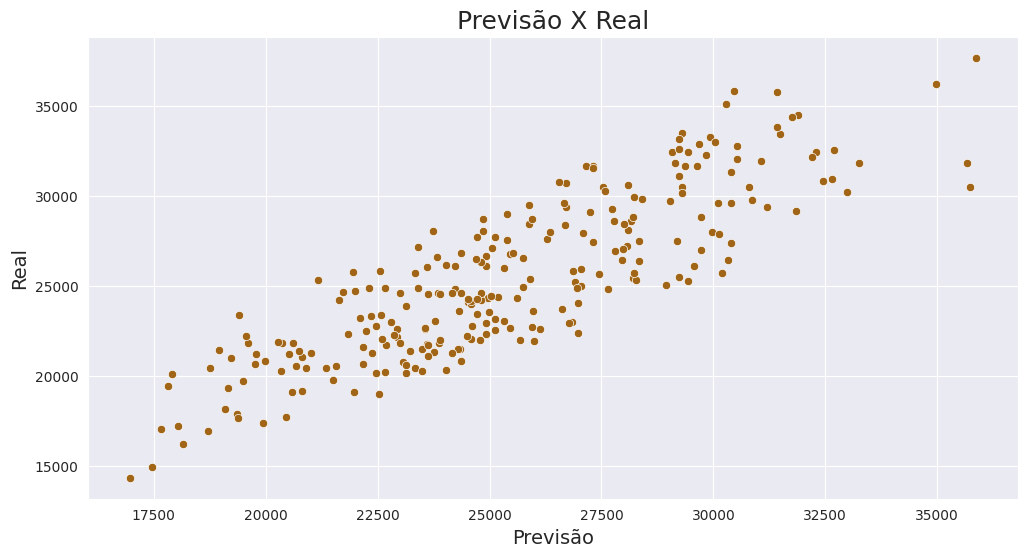

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize = 18)
ax.set_xlabel('Previsão', fontsize = 14)
ax.set_ylabel('Real', fontsize = 14)
ax

## Obtendo o Resíduo

Vamos verificar se os resíduos são constantes, em outras palavras, vamos verificar a homocedasticidade.

In [ ]:
residuos = y_train - y_previsto_train
residuos

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

<Axes: title={'center': 'Resíduo X Previsão'}, xlabel='Previsão', ylabel='Resíduo'>

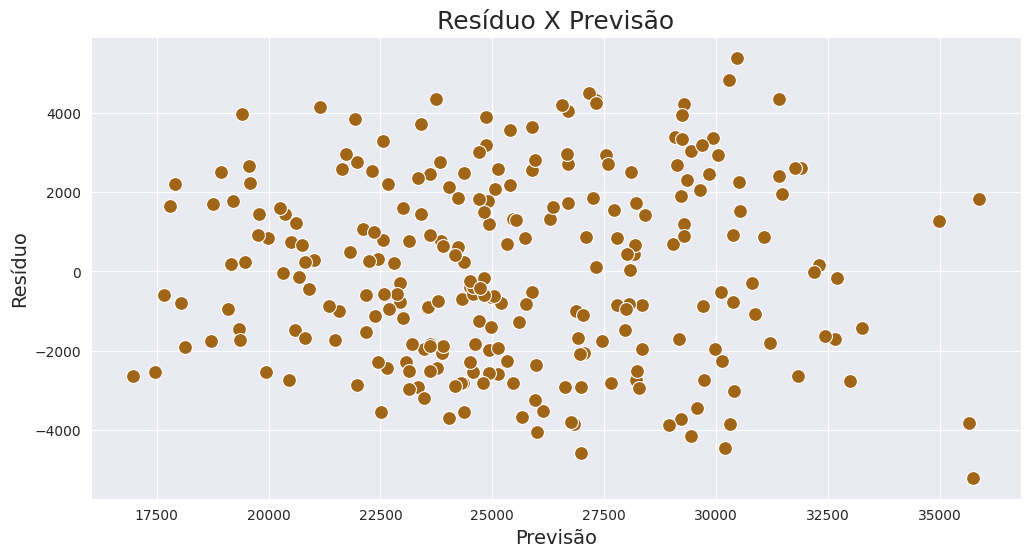

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuos, s = 100)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduo X Previsão', fontsize = 18)
ax.set_xlabel('Previsão', fontsize = 14)
ax.set_ylabel('Resíduo', fontsize = 14)
ax

<Axes: title={'center': 'Resíduo X Previsão'}, xlabel='Previsão', ylabel='Resíduo ao quadrado'>

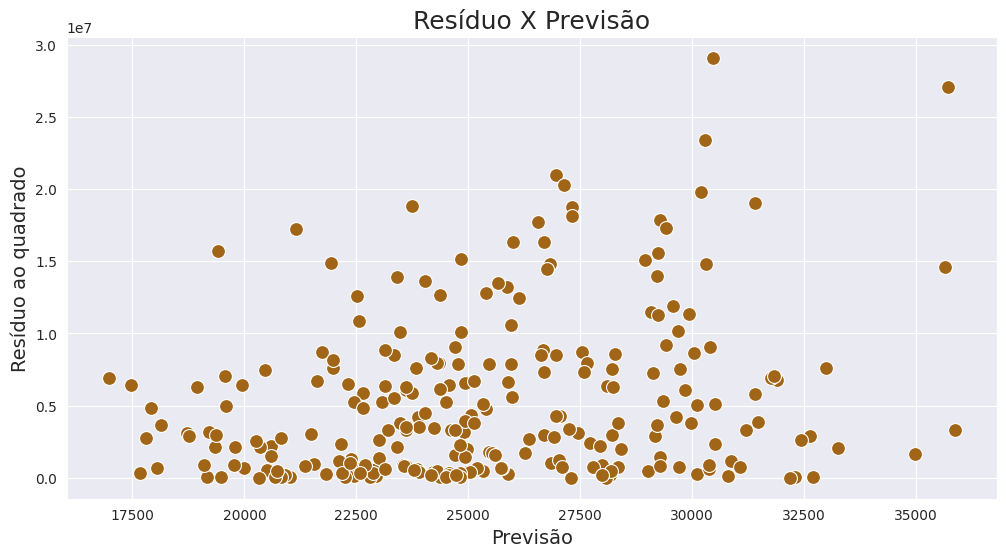

In [ ]:
ax = sns.scatterplot(x = y_previsto_train, y = residuos ** 2, s = 100)
ax.figure.set_size_inches(12, 6)
ax.set_title('Resíduo X Previsão', fontsize = 18)
ax.set_xlabel('Previsão', fontsize = 14)
ax.set_ylabel('Resíduo ao quadrado', fontsize = 14)
ax

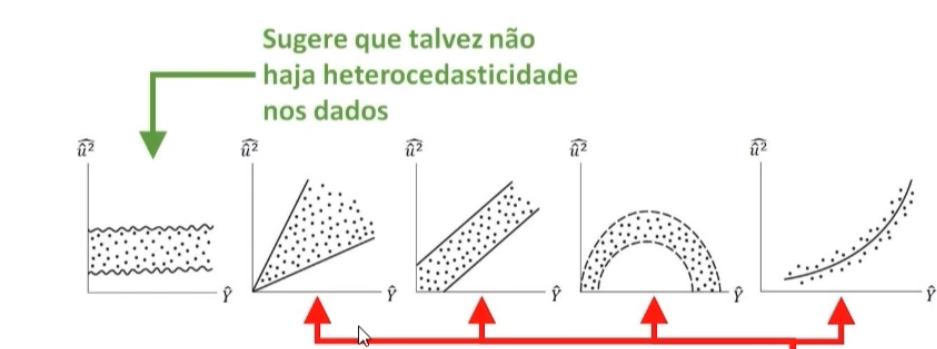

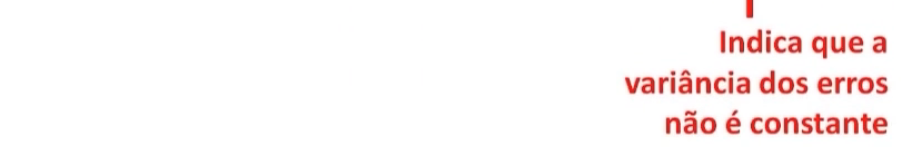

Plotando a distribuição de frequência dos resíduos


Deve-se seguir como uma normal

<ipython-input-47-f2871efa743b>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(residuos)


<Axes: title={'center': 'Distribuição de Frequência dos Resíduos'}, xlabel='Litros', ylabel='Density'>

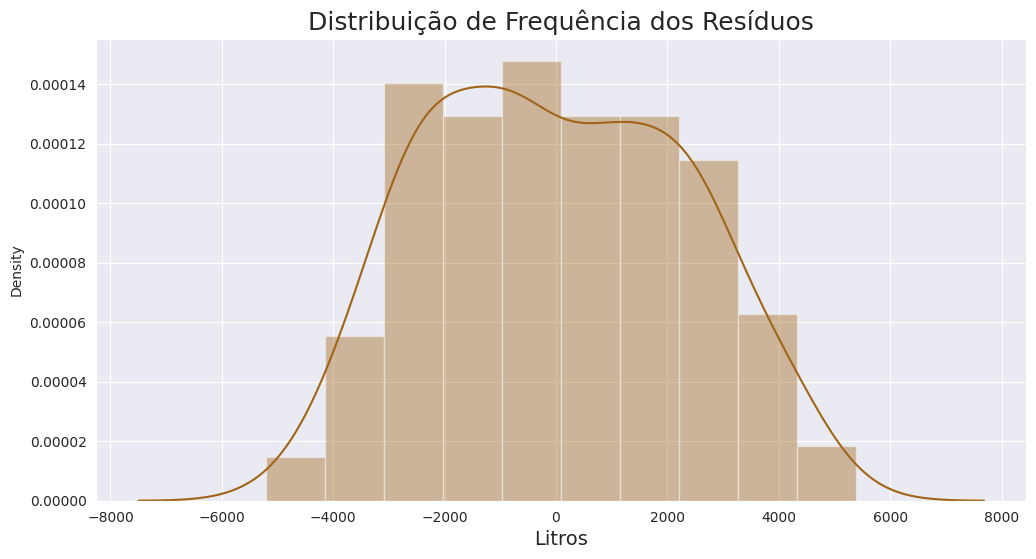

In [ ]:
ax = sns.distplot(residuos)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequência dos Resíduos', fontsize = 18)
ax.set_xlabel('Litros', fontsize = 14)
ax

# Comparando modelos

Vamos criar outro modelo, mas agora usando a variável Temperatura Média invés de Temperatura Máxima.

In [ ]:
X2 = dados[['temp_media', 'chuva', 'fds']]

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state= 2811)

In [ ]:
modelo_2 = LinearRegression()

In [ ]:
modelo_2.fit(X2_train, y2_train)

LinearRegression()

Obtendo o coeficiente de determinação R² do movo modelo e comparando com o do antigo modelo.

In [ ]:
print('Modelo com Temp. máximo')
print('R² = {}'.format(modelo.score(X_train, y_train).round(2)))

Modelo com Temp. máximo
R² = 0.73


In [ ]:
print('Modelo com Temp. media')
print('R² = {}'.format(modelo_2.score(X2_train, y2_train).round(2)))

Modelo com Temp. media
R² = 0.66


In [ ]:
y_previsto = modelo.predict(X_test)
y2_previsto = modelo_2.predict(X2_test)

In [ ]:
print('Modelo com Temp. máximo')
print('R² = {}'.format(metrics.r2_score(y_test, y_previsto).round(2)))

Modelo com Temp. máximo
R² = 0.69


In [ ]:
print('Modelo com Temp média')
print('R² = {}'.format(metrics.r2_score(y2_test, y2_previsto).round(2)))

Modelo com Temp média
R² = 0.66


## Outras Métricas de Regressão

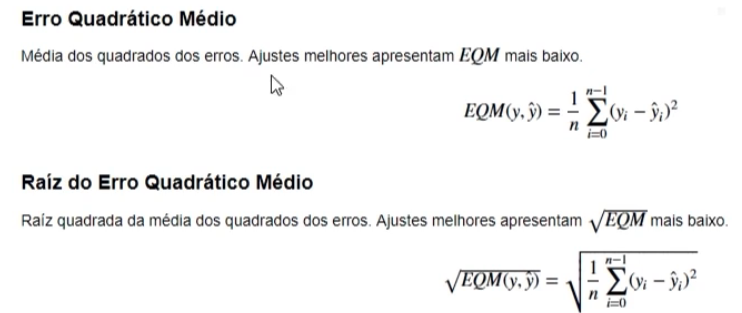

In [ ]:
EQM_2 = metrics.mean_squared_error(y2_test, y2_previsto).round(2)
REQM_2 = np.sqrt(EQM_2)
R2_2 = metrics.r2_score(y2_test, y2_previsto).round(2)

pd.DataFrame([EQM_2, REQM_2, R2_2], ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

Métricas
EQM   6.060775e+06
REQM  2.461864e+03
R²    6.600000e-01

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_previsto).round(2)
REQM = np.sqrt(EQM)
R2 = metrics.r2_score(y_test, y_previsto).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns = ['Métricas'])

Métricas
EQM   5.471976e+06
REQM  2.339226e+03
R²    6.900000e-01

## Utilizando Pickle

O módulo pickle implementa protocolos binários para serializar e desserializar a estrutura de um objeto Python.

In [ ]:
import pickle

In [ ]:
output = open('modelo_consumo_cerveja', 'wb')  ## criamos a varíavel e usamos open para abrir e criar um arquivo em formato wb.
pickle.dump(modelo, output) ## usamos pickle.dump() para preencher a variável/arquivo com o modelo.
output.close ## fechamos o arquivo dentro da variável.

<function BufferedWriter.close>

## Script para abrir o modelo em outro noteboook

In [ ]:
import pickle

modelo = open('modelo_consumo_cerveja', 'rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 31.2
chuva = 0.3
fds = 0
entrada = [[tem_max, chuva, fds]]
print('{0:0.2} litros'.format(lm_new.predict(entrada)[0]))


EOFError: Ran out of input